**5000 Level: Anika Saiprabhu, Ayan Khan, Victoria Valdez**

# 1. Preparation and Overview

## 1.1 Business Understanding

This report focuses on wine quality, explaining whether or not certain factors of wine can predict its quality.  Such information can be used by the wine industry to predict whether their products will be of high quality or not without having to directly sample the product itself, or risk misinforming the customer.


The dataset we chose is Wine Quality data from the following UC Irvine dataset: https://archive.ics.uci.edu/dataset/186/wine+quality.


This data includes 6497 instances of different types of wines (total of red and white), featuring 11 different categories:
> fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.  Quality is the target and color is a miscellaneous category, mostly used to keep red and white wines separate.  However, for the purpose of this analysis, we will collate red and white wines.



For our classifier to be useful, it needs to be able to deliver accuracies higher than 33%. We chose this number because, after processing the data, we will be working with 3 qualities of wine, with 1 being the lowest and 3 being the highest. Since there are 3 qualities, the classifier has a 33% chance of picking the correct quality by random chance alone. To prove that our classifier is classifying correctly by its algorithm and not random chance, it needs to demonstrate accuracy rates higher than 33%.


We hope our analysis can help wine companies better inform their customers. Without directly sampling the wine, manufacturers have to measure other physical characteristics of wine to guage the quality of the product. Since wine is expensive, it matters that wine companies deliver the most accurate ratings of their product.


Thus, our main goal with this analysis is to identify effective ways to accurately report the quality of wine to better ensure trust between manufacturers and consumers.

## 1.2 Data Preparation


To begin, we will process the data to better help with our analysis

### 1.2.1 Imports and Reading Data

For this assignment, we used Google Colab to code parts of the project together as a team. To begin, we cloned  a Github repository where the data was saved. We also imported and installed most of the necessary libraries at the top of the notebook.

In [1]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.model_selection import train_test_split
import plotly
from sklearn.metrics import accuracy_score

In [2]:
if (not os.path.isdir('/ML-Labs')): # checks if the git is already cloned
  !git clone https://github.com/AyawnKhan/ML-Labs.git

fatal: destination path 'ML-Labs' already exists and is not an empty directory.


In [3]:
# Colab defaults to the "content" directory
# This code changes the working directory to the data directory
if (os.getcwd() == '/content' and os.getcwd() != './ML-Labs/Lab3'):
  os.chdir('./ML-Labs/Lab3')
print("New working directory: ",os.getcwd()) # Check that new working dirctory is right

New working directory:  /content/ML-Labs/Lab3


Reading in the data

In [4]:
# reads in data
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red['color']='red'

df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white['color']='white'

df = df_white.append(df_red, ignore_index = True)

# Check if the resulting dataframe contains all entries of red and white by checking lengths
print('length of white:',len(df_white))
print('length of red:', len(df_red))
print('combined length of red and white:', len(df_red) + len(df_white), '= combined length of dataframe:', len(df))
print()
df

length of white: 4898
length of red: 1599
combined length of red and white: 6497 = combined length of dataframe: 6497



<ipython-input-4-d265a0c79d56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_white.append(df_red, ignore_index = True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


The following seeks to visualize the distribution of quality ranks in the dataset.  As the graph demonstrates, the majority of the data consists of wines ranked 5, 6, and 7 – most of the data contains average wines.

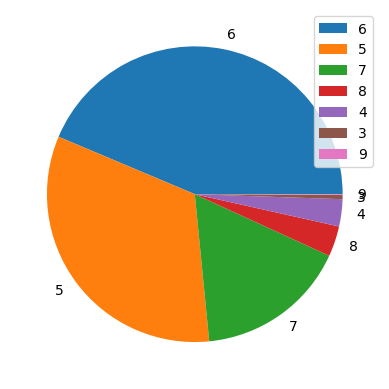

In [5]:
#df.quality.value_counts().sort_values(ascending=False).plot(kind='bar')

# Plot the distribution of default quality rankings in the dataframe
# Quality will be the attribute we try to predict
plt.pie(df.quality.value_counts(), labels=df.quality.unique())
plt.legend()
plt.show()

### 1.2.2 Data Descriptions

Described below are each variable and associated information

In [6]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# variable information
print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

Then, we display the data types of each variable

In [8]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object


Here, we provide a more in-depth breakdown on what the variables indicate:

**Fixed acidity**: measure of natural acids found in wine.

**Volatile acidity**: measure of gaseous acids found in wine.

**Citric acid**: less commonly found in wine, but it's traces of citric acid found in the grapes used to make wine.

**Residual sugar**: natural leftover grape sugars post-fermentation.

**Chlorides**: a factor that potentially makes wine taste saltier.

**Free sulfur dioxide**: unreacted sulfur dioxide found in wine.

**Total sulfur dioxide**: sum of unreacted and bonded sulfur dioxide found in wine.

**Density**: mass per unit of volume of wine.

**pH**: acidic or basic quality of wine.

**Sulphates**: help preserve/enhance the wine.

**Alcohol**: percent of wine that is alcoholic.

**Quality**: a score from 0-10 that measures the quality of wine.

**Color**: either red or white.

### 1.2.3 Cleaning Data

After reading in the data, we began cleaning the data. We started by removing spaces in the column names to make it easier to access attributes.

In [9]:
# Renaming columns to get rid of spaces, makes it easier for us to access attributes later on

df.rename(columns = {"fixed acidity":"fixed_acidity"}, inplace = True)
df.rename(columns = {"volatile acidity":"volatile_acidity"}, inplace = True)
df.rename(columns = {"citric acid":"citric_acid"}, inplace = True)
df.rename(columns = {"residual sugar":"residal_sugar"}, inplace = True)
df.rename(columns = {"free sulfur dioxide":"free_sulfur_dioxide"}, inplace = True)
df.rename(columns = {"total sulfur dioxide":"total_sulfur_dioxide"}, inplace = True)

We then converted color to numeric values to pass it in as a parameter to regression

In [10]:
# Converting color to numeric values

for x in range(len(df.color)):
  temp = df.color[x]
  if temp == 'red':
    df.color[x] = 0
  if temp == 'white':
    df.color[x] = 1

df.color

<ipython-input-10-7f79d0a9525d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.color[x] = 1
<ipython-input-10-7f79d0a9525d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.color[x] = 0


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: object

#### Wine Quality

Since there were large amounts of certain qualities, we started our cleaning by converting the wine quality from a numerical score (0-10) to a categorical ranking. These rankings are also indicated by numerical values in order to use them in the regression model:
- scores 0 - 5 ==> low quality (1)
- scores 6 - 7 ==> medium quality (2)
- scores 8 - 10 ==> high quality (3)

We stored the counts for these new rankings in a dictionary called quality_ranks.

In [11]:
# Normalizing the quality ranks into 3 categories because of the large amount of middle rankings

# Testing if we split the data into 3 categories:
# Dictionary = ranking num : counts
quality_ranks = {
    1 : 0,
    2 : 0,
    3 : 0,

}

# Makes Counts
for x in range(len(df.quality)):
  if df.quality[x] in range(0,6): quality_ranks[1] += 1 # 0 - 5 --> 1
  elif df.quality[x] in range(6, 8): quality_ranks[2] += 1 # 6  --> 2
  elif df.quality[x] in range(8,11): quality_ranks[3] += 1  # 6+ --> 3


# Replaces
for x in range(len(df.quality)):
  if df.quality[x] in range(0,6): df.quality[x] = 1 # 0 - 5 --> 1
  elif df.quality[x] in range(6,8): df.quality[x] = 2 # 6 - 10 --> 2
  elif df.quality[x] in range(8,11): df.quality[x] = 3 # 6 --> 3


print(quality_ranks)

<ipython-input-11-41084d3fb7ac>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df.quality[x] in range(6,8): df.quality[x] = 2 # 6 - 10 --> 2
<ipython-input-11-41084d3fb7ac>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df.quality[x] in range(0,6): df.quality[x] = 1 # 0 - 5 --> 1
<ipython-input-11-41084d3fb7ac>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df.quality[x] in range(8,11): df.quality[x] = 3 # 6 --> 3

{1: 2384, 2: 3915, 3: 198}


We replotted the data with these new categories. You can see that there are substantially more medium quality wines than there are low or high quality wines.

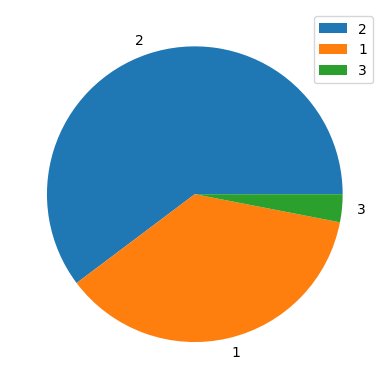

In [12]:
# New distribution of categorized qualities

plt.pie(df.quality.value_counts(), labels=df.quality.unique())
plt.legend()
plt.show()

It still appears that there are a large amount of 2s present.  This is because, in the real world, high quality wines are much rarer than poor quality or medium quality wines.  As a result, this distribution can be considered fair and representative for the rest of our analysis.

<ipython-input-13-4228ca653079>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['quality']].sort_values(by='quality',ascending=False),vmin=-.5,vmax=1,annot=True)


<Axes: >

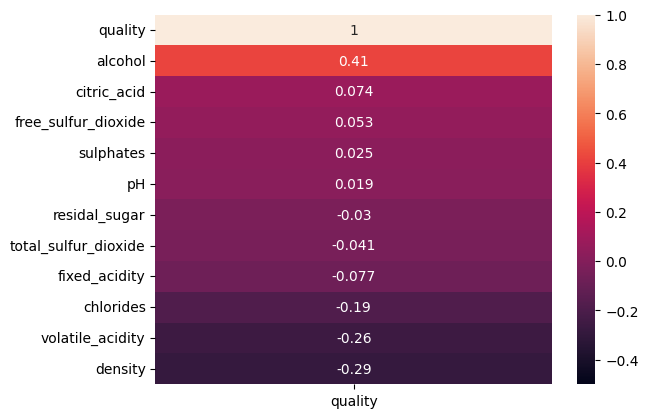

In [13]:
# Heatmap 2

# Generate a heatmap showing the correlation between each attribute and the quality (to be predicted)

sns.heatmap(df.corr()[['quality']].sort_values(by='quality',ascending=False),vmin=-.5,vmax=1,annot=True)

This heatmap shows that alcohol percent and quality are the most strongly and positvely correlated, whereas factors like chlorides, volatile acidity, and density are more negatively correlated with quality. Overall, there was not a strong correlation between the other factors and quality.

One noteworthy finding is that alcohol and density were the two factors that affected quality the most, although density had a negative correlation. For our regression model, we use alcohol and density as two primary factors.

### 1.2.4 Statistical Measures

The following demonstrates counts, means, standard deviations, and five number summaries for each of the categories.

In [14]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residal_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,1.663537
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.533152
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,3.000000


### 1.2.5 Training and Test Split

We will perform training and test splits in subsequent analysis, as we will need to perform this function for multiple columns.

For the rest of this report, we will separate 80% of the data for training and 20% for testing.  This ensures that we don't run into issues of overfitting and underfitting.  Sectioning off 80% of the data for training is wholly representative of the data, and having 20% of the data be tested ensures that there is enough variety in the results.

# 2. Modeling

## 2.1 Custom Regression Classifier

### 2.1.1 Binary Regression Classifier

The following section uses the class Regression code as a basis to define our own custom regression model.

In [15]:

# Used class code of binary logistic regression base

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'

    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta))

    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction


blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


In [16]:

# Used class code of binary logistic regression

class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'

    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape)

        return gradient/float(len(y))

    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate


blr = BinaryLogisticRegression(0.1)

params = dict(eta=0.01,
              iterations=500)

blr = BinaryLogisticRegression(**params)
print(blr)

Untrained Binary Logistic Regression Object


In [17]:
# Used class code to vectorize the binary logistic regression

from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))

    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through

        return gradient.reshape(self.w_.shape)

# use same params as defined above
blr = VectorBinaryLogisticRegression(**params)


### 2.1.2 Multi-class Regression Classifier

In [18]:
# Used class code to construct the multi-class logistic regression, which built from binary logistic regression

class OtherLogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers

        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)

        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier

        return np.hstack(probs) # make into single matrix

    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

lr = OtherLogisticRegression(0.1,1500)
print(lr)

Untrained MultiClass Logistic Regression Object


In [19]:
# Function to run logistic regression with our custom implementation
def other_calc_regression_custom(column_name, accuracies):
  X = np.array(df[column_name])
  X = X.reshape(-1,1)
  Y = df.quality

  # Train-test split of data as described above
  X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size=0.2)

  lr = OtherLogisticRegression(0.1,500)
  lr.fit(X_train,y_train)

  yhat = lr.predict(X_test)
  accuracies.append(accuracy_score(y_test,yhat))
  #print(f"Accuracy of {column_name} to quality: {accuracy_score(y_test,yhat)}")

### 2.1.3 Executing Custom Regression Model

In [20]:
%%time
# Running logistic regression with our custom implementation
custom_accuracies = [] # Store the accuracies in a list for comparison later

# Iterate through each of the features
for col in df.columns:
    if col == 'color': # Ignore color as it's not a feature, according to the dataset documentation
      continue
    other_calc_regression_custom(col, custom_accuracies)
    print()

<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through



CPU times: user 15.5 s, sys: 15.8 s, total: 31.2 s
Wall time: 29.3 s


The training and classification time is roughly 20 seconds with our own implementation.

In [21]:
# Cleaner output

for col in range(len(custom_accuracies)):
    if col == 'color':
      continue
    print(f"Accuracy of {df.columns[col]} to quality: {custom_accuracies[col]}")
    print()

Accuracy of fixed_acidity to quality: 0.5969230769230769

Accuracy of volatile_acidity to quality: 0.6053846153846154

Accuracy of citric_acid to quality: 0.6053846153846154

Accuracy of residal_sugar to quality: 0.6092307692307692

Accuracy of chlorides to quality: 0.5969230769230769

Accuracy of free_sulfur_dioxide to quality: 0.5776923076923077

Accuracy of total_sulfur_dioxide to quality: 0.3507692307692308

Accuracy of density to quality: 0.61

Accuracy of pH to quality: 0.5946153846153847

Accuracy of sulphates to quality: 0.5915384615384616

Accuracy of alcohol to quality: 0.35

Accuracy of quality to quality: 0.9661538461538461



## 2.2 Regularization

The following section uses the class code as a template to implement our regularization algorithm.

In [22]:
# linear boundaries visualization from sklearn documentation
from matplotlib import pyplot as plt
import copy
%matplotlib inline
plt.style.use('ggplot')

def plot_decision_boundaries(lr,Xin,y,title=''):
    # print('i Xin', type(Xin))
    # print(Xin)
    # print('Xin len: ', len(Xin))
    Xb = copy.deepcopy(Xin)
    # print('e Xin',type(Xin))
    # print('Xb',type(Xb))
    # print('y',type(y))

    y_series = y.squeeze()
    # print('y len: ', len(y_series))
    # print('XB len: ', len(Xb))
    lr.fit(Xb.iloc[:,:2],y_series) # train only on two features

    h=0.01
    # create a mesh to plot in
    x_min, x_max = Xb.iloc[:, 0].min() - 1, Xb.iloc[:, 0].max() + 1
    y_min, y_max = Xb.iloc[:, 1].min() - 1, Xb.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # get prediction values
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    # Plot also the training points
    # print('X', Xb.iloc[:, 0])
    # print('Y', Xb.iloc[:, 1])

    plt.scatter(Xb.iloc[:, 0], Xb.iloc[:, 1], c=df.quality, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol Concentration')
    plt.ylabel('Wine Density')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(.985, 1.005)
    # plt.xticks(())
    # plt.yticks(())
    plt.title(title)
    plt.show()


lr = OtherLogisticRegression(0.1,1500) # this is still OUR LR implementation, not sklearn

      alcohol  density
0         8.8  1.00100
1         9.5  0.99400
2        10.1  0.99510
3         9.9  0.99560
4         9.9  0.99560
...       ...      ...
6492     10.5  0.99490
6493     11.2  0.99512
6494     11.0  0.99574
6495     10.2  0.99547
6496     11.0  0.99549

[6497 rows x 2 columns]
0       2
1       2
2       2
3       2
4       2
       ..
6492    1
6493    2
6494    2
6495    1
6496    2
Name: quality, Length: 6497, dtype: int64


<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


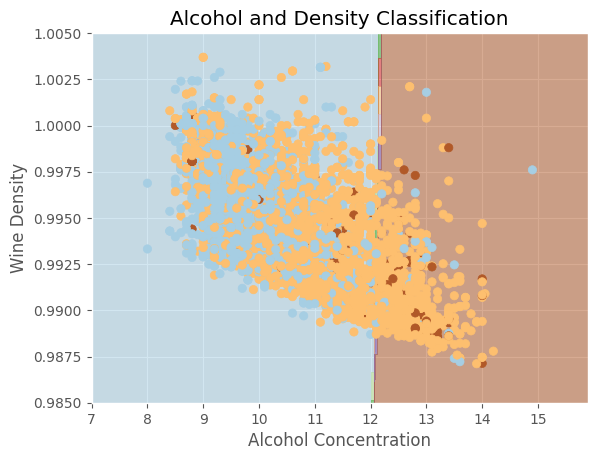

CPU times: user 4.08 s, sys: 3.58 s, total: 7.66 s
Wall time: 9.12 s


In [23]:
# Test plot_decision_boundaries
%%time
from ucimlrepo import fetch_ucirepo
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
X = np.asarray(X).reshape(-1,1)
Y = df.quality

test_df = pd.concat([df.alcohol, df.density], axis=1)
print(test_df)
print(df.quality)
plot_decision_boundaries(lr, test_df, df.quality, title = 'Alcohol and Density Classification')

The graph above shows the logistic regression function run for alcohol and density classifications. The color of the dot represents the quality of wine. The classification for this is a little bit unusual due to the nature of the dataset:
- The sample size for quality rank 3 wine is notably smaller than the other qualities
- The wine densities themselves were so close to each other, even though it had the highest correlation with quality; this makes the line look very straight because the graph range is so small

Due to this, the regression model results are somewhat skewed and difficult to interpret. We conducted an analysis of the accuracies to better understand the two methods.

In [24]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):
        # need to add to the original initializer
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer


    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)

        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient

In [25]:
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(OtherLogisticRegression):
    def __init__(self, C=0.0, **kwds):
        # need to add to the original initializer
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer

    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers

        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            # now this has regularization built into it
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)

        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

<ipython-input-17-ffef3549530f>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through


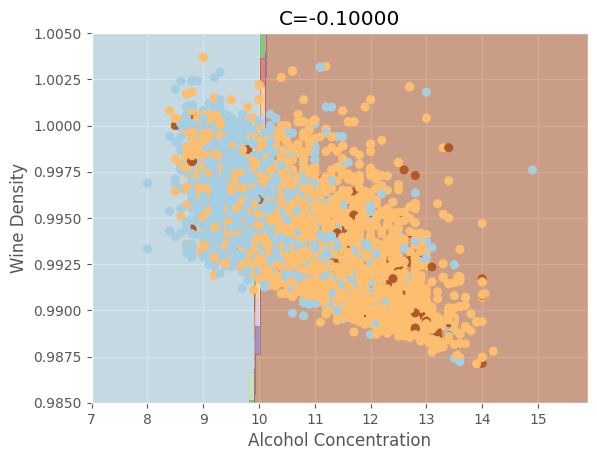

In [26]:


cost_vals = np.logspace(-3,1,15)
def lr_explor(cost_idx):

    # print("after reshape:",X)
    #Y = df.quality
    C = -.1
    lr_clf = RegularizedLogisticRegression(eta=0.1, iterations=2500, C=C) # get object

    # print('TEST', type(C))
    plot_decision_boundaries(lr_clf,test_df,Y,title="C=%.5f"%(C))
    plt.show()

lr_explor(cost_idx = 1)

For similar reasons, this graph's results are also skewed. Despite this, there are visible effects from the regularization of the regression model.

## 2.3 Scikit-learn Regression

The next section uses Scikit-learn's built in regression model to classify the dataset.

In [27]:
#function to calculate logistic regression for each feature using sci-kit learn
def calc_regression(column_name, sk_accuracies):
    X = np.array(df[column_name])
    X = X.reshape(-1,1)
    Y = df.quality

    X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size=0.2)

    lr_sk = SKLogisticRegression(solver='liblinear') #all params default

    lr_sk.fit(X_train,y_train)
    print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
    yhat = lr_sk.predict(X_test)
    sk_accuracies.append(accuracy_score(y_test,yhat))
    #print(f"Accuracy of {column_name} to quality: {accuracy_score(y_test,yhat)}")


In [28]:
%%time
#perform logistic regression for each feature

sk_accuracies = [] # Store accuracies in a list for comparison later on

# Iterate through all the features
for col in df.columns:
  if col == 'color': # Ignore color as it's not a feature, according to the dataset documentation
    continue
  calc_regression(col, sk_accuracies)
  print()

[[-1.24176992  0.09574223]
 [ 0.90031971 -0.06628856]
 [-1.00114723 -0.35205415]]

[[-1.72940562  3.39625263]
 [ 1.49877072 -3.1367177 ]
 [-2.88132006 -1.67787211]]

[[-0.20869957 -1.06226587]
 [ 0.11718363  0.93622462]
 [-3.52125743  0.29454918]]

[[-0.63411523  0.01458303]
 [ 0.49529848 -0.0129696 ]
 [-3.35133777 -0.01567456]]

[[-0.930217    6.44231613]
 [ 0.74413974 -5.38066196]
 [-3.35198182 -2.20881502]]

[[-0.36663461 -0.00566221]
 [ 0.29515933  0.00384641]
 [-3.7716975   0.00980686]]

[[-7.74113192e-01  2.05637027e-03]
 [ 6.35214144e-01 -1.98986785e-03]
 [-3.38320970e+00 -4.37584974e-04]]

[[-1.27555482  0.72933221]
 [ 1.01231736 -0.5989714 ]
 [-1.52097119 -1.90353965]]

[[ 0.17150744 -0.22445853]
 [-0.0511581   0.1456493 ]
 [-1.69552742 -0.53692293]]

[[-0.28994658 -0.48658339]
 [ 0.13703636  0.53787886]
 [-3.01385    -0.86801601]]

[[ 7.50382249 -0.77968357]
 [-5.79103249  0.59742126]
 [-7.66537829  0.396859  ]]

[[ 12.91727052  -8.9387374 ]
 [ -6.58507979   4.34587568]
 [-14

The training and classification time was roughly less than a second with the sci-kit model.

In [29]:
# Cleaner output

for col in range(len(sk_accuracies)):
    if col == 'color':
      continue
    print(f"Accuracy of {df.columns[col]} to quality: {sk_accuracies[col]}")
    print()

Accuracy of fixed_acidity to quality: 0.5969230769230769

Accuracy of volatile_acidity to quality: 0.6253846153846154

Accuracy of citric_acid to quality: 0.6061538461538462

Accuracy of residal_sugar to quality: 0.5938461538461538

Accuracy of chlorides to quality: 0.5861538461538461

Accuracy of free_sulfur_dioxide to quality: 0.6061538461538462

Accuracy of total_sulfur_dioxide to quality: 0.6130769230769231

Accuracy of density to quality: 0.6015384615384616

Accuracy of pH to quality: 0.6015384615384616

Accuracy of sulphates to quality: 0.5961538461538461

Accuracy of alcohol to quality: 0.66

Accuracy of quality to quality: 0.9746153846153847



The above are the accuracy of the sci-kit model when used to classify the quality of the wine based on each column of the dataset.

## 2.4 Comparison

In [30]:
def comparisons(x):
  col = df.columns[x]

  if(custom_accuracies[x] > sk_accuracies[x]):
    max = 'The custom regression model returns a higher accuracy'
    acc = custom_accuracies[x]
    low = sk_accuracies[x]
  elif(custom_accuracies[x] < sk_accuracies[x]):
    max = 'The sci-kit learn regression model returns a higher accuracy'
    acc = sk_accuracies[x]
    low = custom_accuracies[x]
  else:
    max = 'Both regression models return the same accuracy'
    acc = custom_accuracies[x]
    low = custom_accuracies[x]

  print(max, 'for the feature', col, 'to quality at an accuracy of', acc*100, '%')
  print('The difference was', (acc - low)*100, '%')


for x in range(len(custom_accuracies)):
  comparisons(x)
  print()


Both regression models return the same accuracy for the feature fixed_acidity to quality at an accuracy of 59.692307692307686 %
The difference was 0.0 %

The sci-kit learn regression model returns a higher accuracy for the feature volatile_acidity to quality at an accuracy of 62.53846153846154 %
The difference was 2.0000000000000018 %

The sci-kit learn regression model returns a higher accuracy for the feature citric_acid to quality at an accuracy of 60.61538461538461 %
The difference was 0.07692307692307443 %

The custom regression model returns a higher accuracy for the feature residal_sugar to quality at an accuracy of 60.92307692307693 %
The difference was 1.538461538461544 %

The custom regression model returns a higher accuracy for the feature chlorides to quality at an accuracy of 59.692307692307686 %
The difference was 1.0769230769230753 %

The sci-kit learn regression model returns a higher accuracy for the feature free_sulfur_dioxide to quality at an accuracy of 60.615384615

The above is a summary of the difference in accuracy between the models. An analysis of these accuracies is done below (after the graph).

In [31]:
x_vals = []
for x in range(len(custom_accuracies)):
  x_vals.append(x + 1)

In [32]:
# Confirms lengths
# print(len(x_vals))
# print(len(custom_accuracies))
# print(len(sk_accuracies))

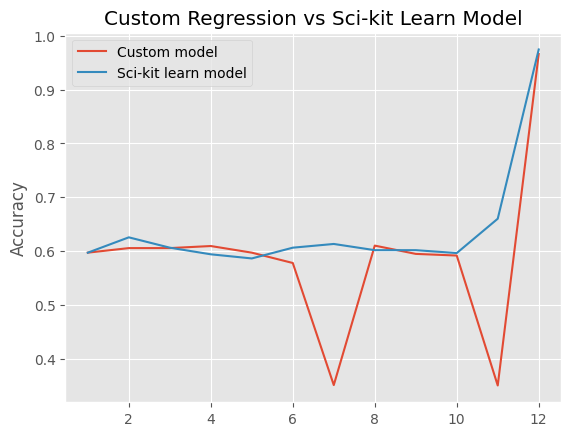

In [33]:
plt.plot(x_vals, custom_accuracies, label = 'Custom model')
plt.plot(x_vals, sk_accuracies, label = 'Sci-kit learn model')
plt.title('Custom Regression vs Sci-kit Learn Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<ipython-input-34-52c9780498b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=accuracies, palette='mako')
<ipython-input-34-52c9780498b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=accuracies, palette='mako')
<ipython-input-34-52c9780498b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=accuracies, palette='mako')
<ipython-input-34-52c9780498b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

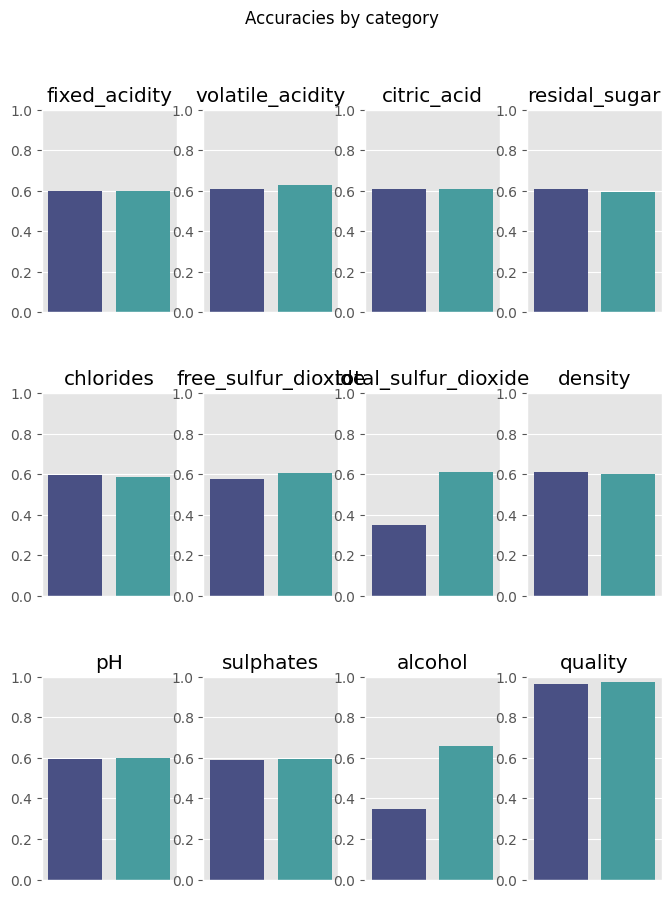

In [34]:
# custom_accuracies
# sk_accuracies
fig, axes = plt.subplots(3, 4, figsize=(8,10))
fig.suptitle('Accuracies by category')
plt.subplots_adjust(hspace=.4)
for i in range(len(x_vals)):
  plt.ylim(0,1)
  plt.subplot(3, 4, i+1)

  accuracies = [custom_accuracies[i], sk_accuracies[i]]
  sns.barplot(x=[0, 1], y=accuracies, palette='mako')

  plt.title(df.columns[i])


  plt.xticks(())

plt.show()



Overall, the models returned similar accuracies, but sci-kit learn returned mostly higher accuracy rates. It's clear that Sci-kit learn's implementation is more effective across the board; this is likely due to the complexity and effectiveness of the operations done within the library.

# 3. Deployment

We would advise the implementation of the sci-kit learn regression model. While this report shows that both models returned similar levels of accuracy for many features of wine to the quality, the sci-kit learn model performed significantly faster. Our custom implementation took, on average, 20 seconds to train and test, whereas the sci-kit learn model only took less than a second. While 20 seconds does not appear to be that long, it shows that the custom implementation is computationally expensive, and for larger sets of data, or with more features, this method of logistic regression will take inordinate amounts of time. In addition, the sci-kit learn model requires less code, as many of the functions are already built into the tool. As a result, we reccomend using the sci-kit learn logistic regression model. There is some value in a custom regression model, if there was more advanced pre-processing required for a specific project. Beyond these niche circumstances, we overall advise that Sci-kit learn is a more effective tool for the majority of cases.

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/ML-Labs/Lab3/Ml-Lab3.ipynb